  ### Sumedh Kumar Prasad Heart logistic Regression

### Problem Statement: Finding out the different factors causing  Atherosclerotic Heart Disease (AHD)

## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## importing dataset

In [2]:
data=pd.read_csv('Heart.csv',index_col=0)

In [3]:
data.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [5]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


## Dropping the all the NA values from the dataset

In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data.isnull().any()

Age          False
Sex          False
ChestPain    False
RestBP       False
Chol         False
Fbs          False
RestECG      False
MaxHR        False
ExAng        False
Oldpeak      False
Slope        False
Ca           False
Thal         False
AHD          False
dtype: bool

In [8]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


###  Finding the correlation between all the numerical variables 

In [9]:
data.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
Age,1.000000,-0.092399,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210
Sex,-0.092399,1.000000,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925
RestBP,0.290476,-0.066340,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954
Chol,0.202644,-0.198089,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945
Fbs,0.132062,0.038850,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086
RestECG,0.149917,0.033897,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021
MaxHR,-0.394563,-0.060496,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727
ExAng,0.096489,0.143581,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232
Oldpeak,0.197123,0.106567,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452
Slope,0.159405,0.033345,0.121172,-0.009215,0.047819,0.135141,-0.389307,0.250572,0.579037,1.000000,0.109761


## Heatmap of correlation variables

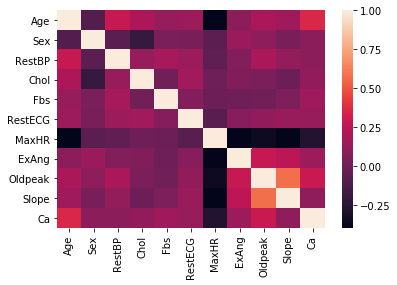

In [11]:
sns.heatmap(data.corr(),linecolor="yellow")

### Conclusion from the Heatmap is :

### From the corelation we conclude that none of variables are related to each other(No interaction is there between the variables) so we can include all the variables in our dataset for the analysis.


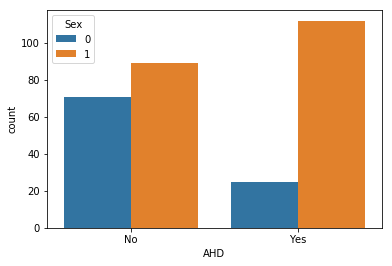

In [12]:
sns.countplot(x='AHD',hue='Sex', data=data)


### conclusion : Male has heigher alveolar hydatid disease(AHD) than Female counterpart.

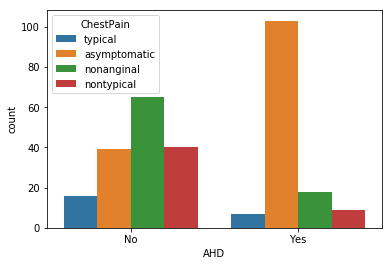

In [13]:
sns.countplot(x='AHD',hue='ChestPain', data=data)

## From the graph it is clear that asymptomatic chest pain causing the Maximum number of AHD attack .

/Users/sanaam/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


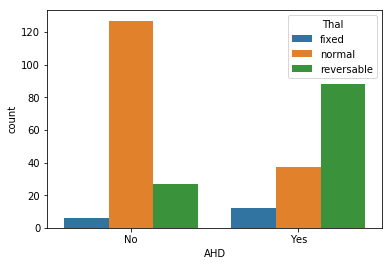

In [13]:
sns.countplot(x='AHD',hue='Thal', data=data)

## From the graph it is clear that Thal having normal not causing the AHD attack most.

Text(0.5,0,'Age')

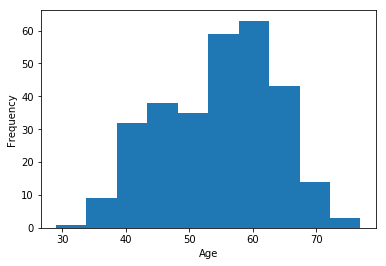

In [14]:
data['Age'].plot.hist()
plt.xlabel('Age')

##  From the above graph it is clear that Age is approx normally distributed.

###  Categorical variables (creating dummy variables)

In [14]:
data.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [15]:
data.head(2)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


In [16]:
data1=data.drop(['ChestPain','Thal'],axis=1)

In [17]:
data1.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
1,63,1,145,233,1,2,150,0,2.3,3,0.0,No
2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes


In [20]:
data=pd.concat([data1,dummy],axis=1)

In [26]:
data.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,0,0,0,1,0


###  Splitting dataset into dependent (X) & independent variables (Y)



In [27]:
data.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'AHD', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal',
       'Thal_reversable'],
      dtype='object')

In [28]:
x=data[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal',
       'Thal_reversable']]

y=data['AHD']

y=pd.get_dummies(data['AHD'],drop_first=True)

In [29]:
x.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0


In [30]:
y.head(2)

,Yes
1,0
2,1


## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).
## Train Test Split of the existing heart dataset.


In [31]:
from sklearn.cross_validation import train_test_split

/Users/sanaam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3,random_state=101)

In [33]:
y_test[0:5]

,Yes
258,0
275,1
190,1
274,0
136,0


In [34]:
x_test[0:3].T

,258,275,190
Age,76.0,59.0,69.0
Sex,0.0,1.0,1.0
RestBP,140.0,134.0,140.0
Chol,197.0,204.0,254.0
Fbs,0.0,0.0,0.0
RestECG,1.0,0.0,2.0
MaxHR,116.0,162.0,146.0
ExAng,0.0,0.0,0.0
Oldpeak,1.1,0.8,2.0
Slope,2.0,1.0,2.0


## Training and Predicting

In [36]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/Users/sanaam/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_predictions = logmodel.predict(x_test)

## Finding  significant variables

In [100]:
import statsmodels.api as sm

In [93]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [105]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/Users/sanaam/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/sanaam/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [107]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  207
Model:                          Logit   Df Residuals:                      190
Method:                           MLE   Df Model:                           16
Date:                Sun, 10 Jun 2018   Pseudo R-squ.:                    -inf
Time:                        15:36:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -1918.8
                                        LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3550      3.603     -0.376      0.707      -8.417       5.707
Age                     -0.0198      0.033     -0.603      0.547      -0.084       0.044
Sex                      0.9558      0.631      1.514      0.130      -0.282       2.193
RestBP                   0.0279      0.014      1.981      0.048       0.000       0.055
Chol                     0.0034      0.005      0.710      0.478      -0.006       0.013
Fbs                     -0.8584      0.795     -1.079      0.281      -2.418       0.701
RestECG                  0.3986      0.250      1.594      0.111      -0.092       0.889
MaxHR                   -0.0351      0.015     -2.398      0.016      -0.064      -0.006
ExAng                    0.1698      0.571      0.297      0.766      -0.950       1.290
Oldpeak                  0.4138      0.295      1.402      0.161      -0.165       0.992
Slope                    0.6533      0.479      1.364      0.173      -0.286       1.592
Ca                       1.3000      0.349      3.725      0.000       0.616       1.984
ChestPain_nonanginal    -2.3257      0.665     -3.496      0.000      -3.630      -1.022
ChestPain_nontypical    -1.0752      0.675     -1.592      0.111      -2.399       0.249
ChestPain_typical       -2.5429      0.862     -2.952      0.003      -4.232      -0.854
Thal_normal              0.3314      1.121      0.296      0.767      -1.865       2.528
Thal_reversable          2.1623      1.108      1.952      0.051      -0.009       4.334
========================================================================================
"""

In [96]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [97]:
significant_vars = get_significant_vars( lg )

In [98]:
significant_vars

['RestBP', 'MaxHR', 'Ca', 'ChestPain_nonanginal', 'ChestPain_typical']

##  Evalutation of the model


We can check Accuracy,precision and recall, using classification report!


## Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [49]:
cm=confusion_matrix(y_test,predictions)

In [50]:
cm

array([[47,  6],
       [ 8, 29]])

## Graphical representation in terms of confusion matrix

In [71]:
import seaborn as sn
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

In [72]:
from sklearn import metrics

In [66]:
metrics.confusion_matrix(y_test,y_predictions)

array([[47,  6],
       [ 8, 29]])

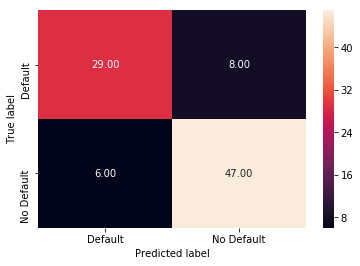

In [73]:
draw_cm( y_test, y_predictions )

Note: the model could only predict very few default classes.

## Drawing the ROC plot for the Model

In [75]:
auc_score = metrics.roc_auc_score( y_test, y_predictions  )
round( float( auc_score ), 2 )

0.84

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

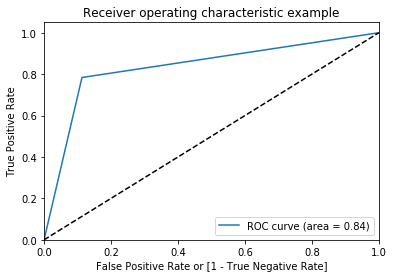

In [78]:
fpr, tpr, thresholds = draw_roc( y_test, y_predictions ) 
## if blue line is below 45 degree it means model is not doing good.

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87        53
          1       0.83      0.78      0.81        37

avg / total       0.84      0.84      0.84        90



In [81]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_predictions), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_predictions ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_predictions ), 2 ) )

cm1 = metrics.confusion_matrix( y_test, y_predictions, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.84
Precision :  0.83
Recall :  0.78
Sensitivity :  0.78
Specificity :  0.89


##  Total accuracy of my model is 84% .

# Conclusion: 

Our model predicted with the accuracy of 84% that (AHD) Atheroselerotic Heart Disease is caused  by the above given independent variables like( ChestPain  RestBP  Cholestrol ,Fbs & so on.) because there is no correlation between the any variable. Precision is 83% and Recall is 78% so there is not much difference between both, as both values close to each other and it is greater than 70%. Area under the Curve is the 84% which is above the 45 degree line which shows that Model is good. 

### Target variable for this Model is Atherosclerotic Heart Disease  (AHD)

###  It is a type of Classification problem within that "Logistics Regression". 

